### **Task: Perform dimensionality reduction by applying Principal Component Analysis on the given dataset and eventually fit a logistic regression model on the reduced data**

## Importing libraries and data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**No null values are present**

# Pre-processing

In [ ]:
X = df.drop("HeartDisease",axis=1)
y = df.HeartDisease

## Preprocessing task
* Apply label encoding on `X`
* Re-scale the data to get the data of same magnitude
* Apply train test split

### Label encoding

In [ ]:
# apply label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in X.columns:
 X[i]= label_encoder.fit_transform(X[i])


In [ ]:
for i in X.columns:
  print(X[i])

0      12
1      21
2       9
3      20
4      26
       ..
913    17
914    40
915    29
916    29
917    10
Name: Age, Length: 918, dtype: int64
0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64
0      1
1      2
2      1
3      0
4      2
      ..
913    3
914    0
915    0
916    1
917    2
Name: ChestPainType, Length: 918, dtype: int64
0      41
1      55
2      31
3      39
4      49
       ..
913    14
914    45
915    31
916    31
917    39
Name: RestingBP, Length: 918, dtype: int64
0      147
1       40
2      141
3       72
4       53
      ... 
913    122
914     51
915      9
916     94
917     35
Name: Cholesterol, Length: 918, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64
0      1
1      1
2      2
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Resti

In [ ]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          122          0           1   
914   40    1              0         45           51          1           1   
915   29    1              0         31            9          0           1   
916   29    0              1         31           94          0           0   
917   10    1              2         39           35          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

### Standard scaler

In [ ]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

### Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state = 0) # split data

## Apply Logistic Regression before applying PCA

In [ ]:
from sklearn.linear_model import LogisticRegression


model =LogisticRegression(random_state = 0)
model.fit(X_train, y_train) # Apply Logistic regression and fit on X_train, y_train
model.score(X_test, y_test)

0.8315217391304348

## PCA

* Apply PCA with number of components = 5
* fit and transform pca on `X` and store new data in `X2`


In [ ]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 5) # create pca object here
X2 =pca.fit_transform(X) # 

* Find number of components of pca

In [ ]:
# print the number of components of pca
pca.explained_variance_ratio_

array([0.25106802, 0.13022881, 0.10553234, 0.09102773, 0.07965579])

**Explained variance ratio** is the amount of variance explained by each feature (component) of PCA 

Text(0, 0.5, 'cumulative explained variance')

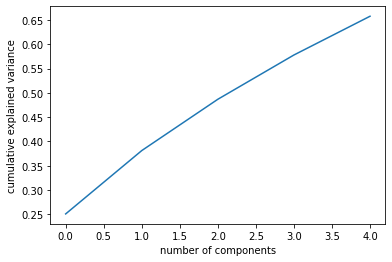

In [ ]:
# print the variance explained by priciple components (there is an in-built attribute of pca for finding this)
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Print the total variance explained
np.sum(pca.explained_variance_ratio_)

0.6575126841045318

### Run the cells below to apply LogisticRegression on reduced data

In [ ]:
# Train test split of X2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=47)

In [ ]:
log = LogisticRegression(max_iter=1000)
log = log.fit(X_train, y_train)
log.score(X_test, y_test)

0.8315217391304348